# Analysis of customer loyalty report of Interconnect Telecom company

## Introduction
### The purpose of this project is to predict if an existing customer is planning to leave Interconnect telecom operator. As a results company can figure out promotional plan to keep the customer loyal to company.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
contract = pd.read_csv('contract.csv')
personal = pd.read_csv('personal.csv')
internet = pd.read_csv('internet.csv')
phone = pd.read_csv('phone.csv')


In [3]:
contract

In [4]:
contract.isna().sum()

In [5]:
contract.duplicated().sum()

In [6]:
contract.describe()

In [7]:
contract['BeginDate'].value_counts()

In [8]:
len(contract[contract['EndDate']== 'No'])/ len(contract['EndDate'])

#### In contract dataframe we noticed that 73% of the customers are still with company and 27 % has already left the company so the data is unbalanced.

In [9]:
personal

In [10]:
personal.isnull().sum()

In [11]:
personal.duplicated().sum()

In [12]:
personal.describe()

In [13]:
merge_data_1 = pd.merge(contract, personal, on='customerID', how='left')
merge_data_1

#### Looked at contract and personal data frame. Trying to make sure there is no duplicated or missing data. Also merged contract and personal data frame to merge_data_1 dataframe.

In [14]:
internet

In [15]:
phone

In [16]:
phone.duplicated().sum()

In [17]:
phone.isnull().sum()

In [18]:
merge_data_2 = pd.merge(phone, internet, on = 'customerID', how='left')
merge_data_2

#### Looked at internet and phone data frame. Trying to make sure there is no duplicated or missing data. Also merged both data frame to merge_data_2 dataframe.

In [19]:
df = pd.merge(merge_data_1, merge_data_2, on= 'customerID', how='left')
df

In [20]:
df.head()

In [21]:
df.isna().sum()

In [22]:
df.duplicated().sum()

In [23]:
df.columns = df.columns.str.lower()

#### Converted the columns names to lower cases. Looking at missing data and duplicated data merged data frame.

In [24]:
df.info()

In [25]:
df['begindate']= pd.to_datetime(df['begindate'])

In [26]:

df['totalcharges'] = df['totalcharges'].replace(' ', None)
df['totalcharges'] = df['totalcharges'].astype(float)

In [27]:
df['totalcharges'].isnull().sum()

In [28]:
df['totalcharges']= df['totalcharges'].fillna(0)
df['totalcharges'].isnull().sum()

In [29]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy='most_frequent')

df['internetservice'] = imputer.fit_transform(df[['internetservice']]).ravel()
df['streamingmovies'] =  imputer.fit_transform(df[['streamingmovies']]).ravel()
df['streamingtv'] =  imputer.fit_transform(df[['streamingtv']]).ravel()
df['deviceprotection'] =  imputer.fit_transform(df[['deviceprotection']]).ravel()
df['onlinesecurity'] =  imputer.fit_transform(df[['onlinesecurity']]).ravel()
df['onlinebackup'] =  imputer.fit_transform(df[['onlinebackup']]).ravel()
df['techsupport'] =  imputer.fit_transform(df[['techsupport']]).ravel()
df['multiplelines'] =  imputer.fit_transform(df[['multiplelines']]).ravel()
df['seniorcitizen'] =  imputer.fit_transform(df[['seniorcitizen']]).ravel()
df['paymentmethod'] =  imputer.fit_transform(df[['paymentmethod']]).ravel()
df['enddate']= imputer.fit_transform(df[['enddate']]).ravel()


In [30]:
df.info()

#### Found 3 missing values in total charges column, filled it with zeros.

In [31]:
exited = df[df['enddate'] != 'No']
exited

### The customers who are churning away:
### The customers who were on monthly plan.The customers with fiber optic internet service. Most customers churned away in November and December of 2019.

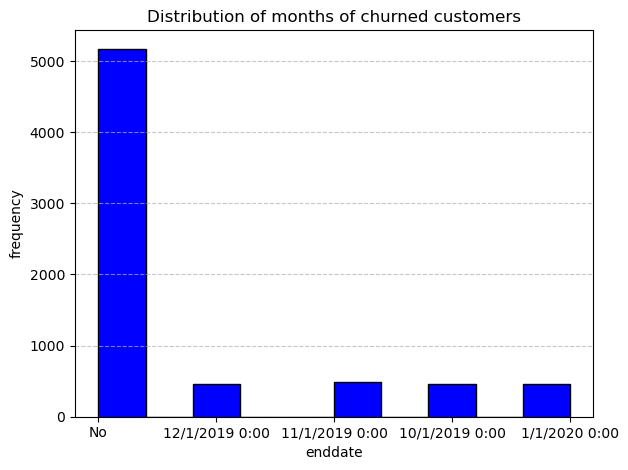

In [32]:
x= df['enddate']

plt.hist(x, bins=10, color='blue', edgecolor='black')
plt.xlabel('enddate')
plt.ylabel('frequency')
plt.title('Distribution of months of churned customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

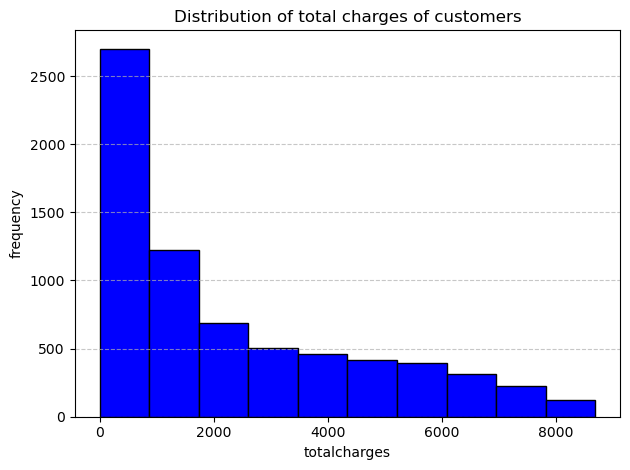

In [33]:
x= df['totalcharges']

plt.hist(x, bins=10, color='blue', edgecolor='black')
plt.xlabel('totalcharges')
plt.ylabel('frequency')
plt.title('Distribution of total charges of customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


### Most of the total charges are under $2000.00.

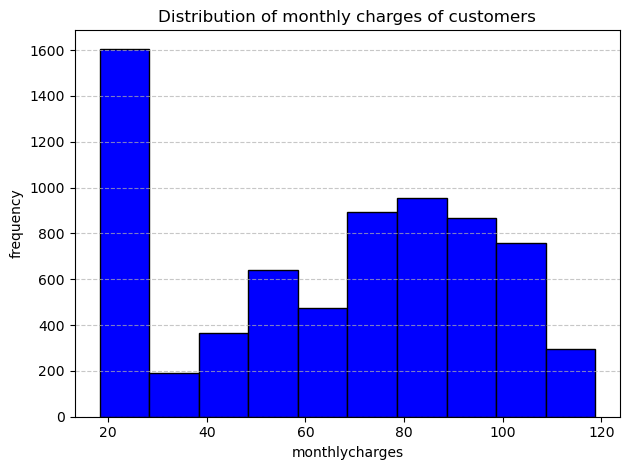

In [34]:
x= df['monthlycharges']

plt.hist(x, bins=10, color='blue', edgecolor='black')
plt.xlabel('monthlycharges')
plt.ylabel('frequency')
plt.title('Distribution of monthly charges of customers')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

#### Most of the monthly charges ranges from $73.00- $80.00. 

In [35]:
def encoding(date):
        
        if date != 'No':
            return 'Yes'
        else:
            return 'No'

In [36]:
df['enddate'] = df['enddate'].apply(encoding)
df

In [37]:
df['internetservice'].isnull().sum()

In [38]:
df.isnull().sum()

In [39]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

imputer = SimpleImputer(strategy='most_frequent')

df['internetservice'] = imputer.fit_transform(df[['internetservice']]).ravel()
df['paymentmethod'] =  imputer.fit_transform(df[['paymentmethod']]).ravel()


In [40]:
## One hot encoding

df['dependents']= df['dependents'].map({'Yes':1, 'No':0})
df['partner'] = df['partner'].map({'Yes':1, 'No':0})
df['streamingmovies'] = df['streamingmovies'].map({'Yes':1, 'No':0})
df['streamingtv'] = df['streamingtv'].map({'Yes':1, 'No':0})
df['multiplelines'] = df['multiplelines'].map({'Yes':1, 'No':0})
df['gender'] = df['gender'].map({'Male':1, 'Female':0})
df['type'] = df['type'].map({'Two year':2,'One year':1, 'Month-to-month':0})
df['internetservice'] =df['internetservice'].map({'DSL':1, 'Fiber optic':0})
df['paperlessbilling'] = df['paperlessbilling'].map({'Yes':1, 'No':0})
df['onlinebackup'] = df['onlinebackup'].map({'Yes':1, 'No':0})
df['deviceprotection'] = df['deviceprotection'].map({'Yes':1, 'No':0})
df['techsupport'] = df['techsupport'].map({'Yes':1, 'No':0})
df['onlinesecurity'] = df['onlinesecurity'].map({'Yes':1, 'No':0})
df['paymentmethod'] = df['paymentmethod'].map({'Electronic check': 3, 'Mailed check': 2, 'Credit card(automatic)': 1, 'Bank transfer(automatic)': 0})
df['enddate'] = df['enddate'].map({'Yes':1, 'No': 0})



### Encoding the columns with 1's and 0's so building a model for machime learning becomes easier.

In [41]:
df['begindate'] =pd.to_datetime(df['begindate']).apply(lambda x: x.timestamp())

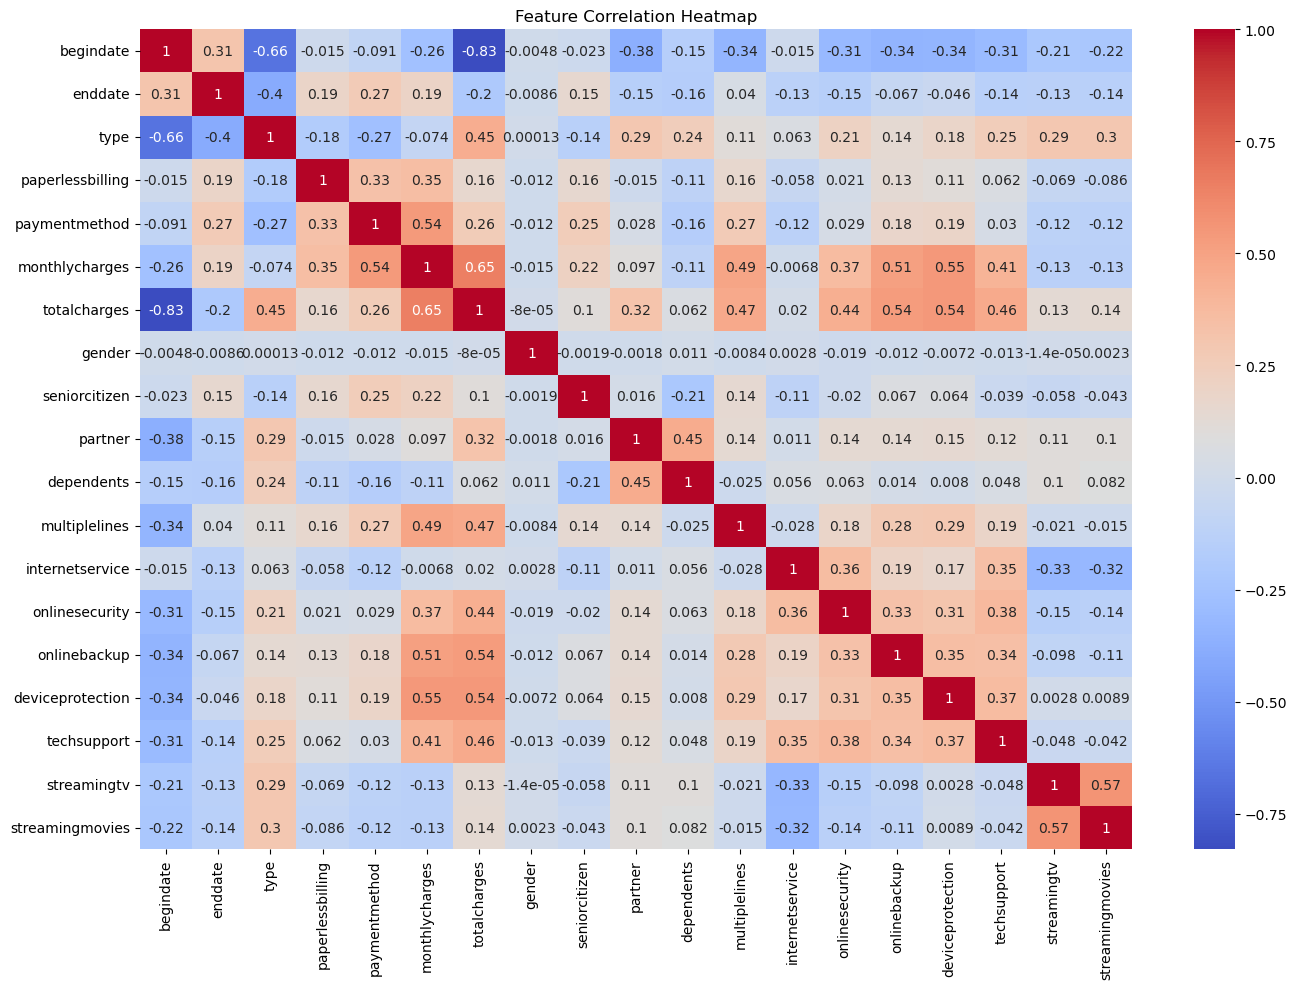

In [42]:
# Pearson correlation of feature correlations
plt.figure(figsize=(14, 10))
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()

### A moderate positive correlation(0.65) between monthly charges and total charges.
###  There is moderate positive correlation between streamingtv and streamingmovies.
### Begindate and total charges have negative correlation(-0.83). It could mean earlier start date mean lower total charges.
### Type and total charges has weak but positive correlation(0.45). As the type changes from one year to two year the total charges increases but it is not always.

In [43]:
df['enddate'].isnull().sum()

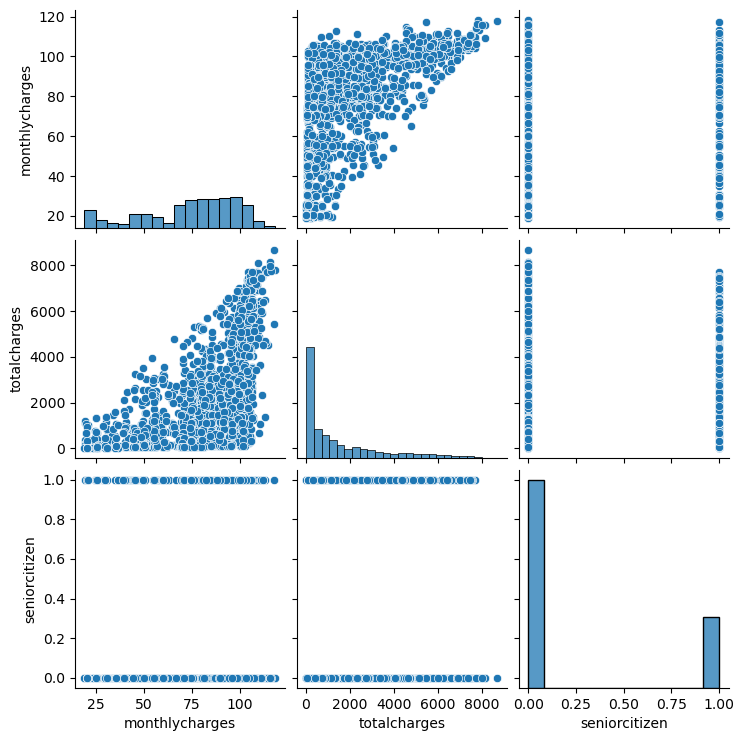

In [44]:
sns.pairplot(exited)

#### In the above scatter plot we can see that as monthly charges are increasing the total charges are increasing.
#### There are less senior citizens than non- senior citizens based on the graph. 

## Initial Conclusion will be updated later as the project progresses:
####  Monthly charges are reasonably correlated to streaming tv, streaming movies. Total charges are reasonable correlated to type. Senior citizens is very negatively correlated to type, dependents.
#### The customers who are churning away:
#### The customers who were on monthly plan. The customers with fiber optic internet service Most customers churned away in November and December of 2019.
#### Monthly charges is reasonably correlated to streaming tv, streaming movies and total charges.

## Task in preprocessing 

#### Converted the columns names to lower cases. Looking at missing data and duplicated data merged data frame.
#### Change the BeginDate to date type.
#### Change the total charges column to float type.
#### 

## Task performed in feature engineering

#### Create the Dropped the columns like paperlessbilling, techsupport, deviceprotection, onlinesecurity, onlinebackup, paymentmethod as they dont seem relevant.
#### Handle missing value in total charges column and filled it with 0.
#### One hot coding for catergorical variables.
#### Conduct feature correlation with heatmap to understand the relations in different variables.
#### Work on class unbalance set.

## Proposed Work Plan

### In this project our goal is to prepare a machine learning model to predict if a customer will leave the service. The steps to achieve it are as follows
#### 1. Download the data
#### 2. Explore the data to determine how to preprocess the data.
    ##### Use pandas and 
    ##### describe(), info(), head() are used.
#### 3. Perform the preprocessing that will make the data ready for preparing the model.
    ##### Merge the data from all dataframe into one data frame.
    ##### Change the column name to lowercases.
    ##### Change the data types
#### 4. Perform EDA to explore the data in depth
    ##### Plot histogram and pair plot by using matplotlib or seaborn library for visualization. 
#### 5. Feature Engineering
    ##### Handle missing value in total charges column and filled it with 0.
    ##### One hot coding for catergorical variables.
    ##### Conduct feature correlation with heatmap.
    ##### Work on class unbalance set.
#### 6. Building the base model with: Logistic Regression 
    ##### Split the dataset into training and testing dataset from sklearn.
#### 7. Hyperparameter Tuning 
     ##### Use grid search or cross-validation to fine tune the model.
#### 8. Choose the best model  
     ##### Onn training dataset based on ROC and AUC score.
     ##### Try 3-4 classification models.
#### 9. Test the best model on testing dataset and verify its accuracy.
#### 10. Compile Conclusion 
     ##### Summarize the model performance and recommendations for potential business actions


## Scaling and balancing the dataset

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

target= df['enddate']
features = df.drop('enddate', axis=1)

features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size= 0.2, random_state=42)
features_test, features_valid, target_test, target_valid = train_test_split(features, target, test_size= 0.5, random_state=42)


In [46]:

target_train = target_train.astype(int)
target_valid = target_valid.astype(int)
target_test = target_test.astype(int)

In [47]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric =['monthlycharges','totalcharges']

preprocessor =ColumnTransformer(transformers=[('num', StandardScaler(), numeric)])

features_train_transformed = preprocessor.fit_transform(features_train)
features_valid_transformed = preprocessor.transform(features_valid)
features_test_transformed = preprocessor.transform(features_test)


In [48]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

features_train_resample, target_train_resample = smote.fit_resample(features_train_transformed, target_train)


### df['enddate'] is the target as if it is equal to 'No'it means the customer is still loyal to the company but if there is end date means the customer has already left the company.
### Scaling the dataframe it helps features perform in similar range by equalizing their contribution. It is essential for algorithm which are sensitive to feature changes. 
### Simple imputer is helping to fill the missing data with mean value helps complete the dataset by overall stabilizing the model and reducing the  variance.
### Smote helps to create more instances or datapoints for the minority classes so that it can balance positive and negative classes which can lead more fair and robust model production. So all the classes can be represented reasonably. 

In [49]:
print(features_train_resample.shape)
print(target_train_resample.shape)

### Base Model _ Logistic Regression 

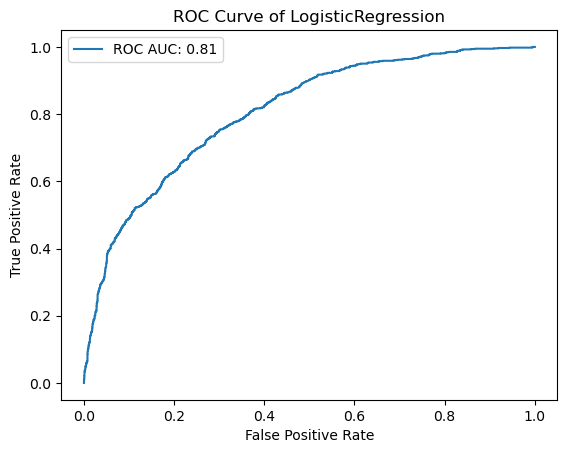

In [50]:
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
# from sklearn.metrics import accuracy_score

model_lr = LogisticRegression(max_iter= 200,solver= 'liblinear', random_state=42)
model_lr.fit(features_train_resample, target_train_resample)

pred = model_lr.predict_proba(features_valid_transformed)[:, 1]
accuracy = model_lr.score(features_valid_transformed, target_valid)
roc_auc = roc_auc_score (target_valid, pred)

print()
print("AUC-ROC of LogisticRegression model:", roc_auc)
print("Accuracy of LogisticRegression model:", accuracy)


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(target_valid, pred)
plt.plot(fpr, tpr, label=f"ROC AUC: {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of LogisticRegression")
plt.legend()
plt.show()


### The LogisticRegression is our base model. Our base model tested on validation set and produced AUC-ROC of 80% and Accuracy of 72%.

## Model 1: DecisionTreeClassifier

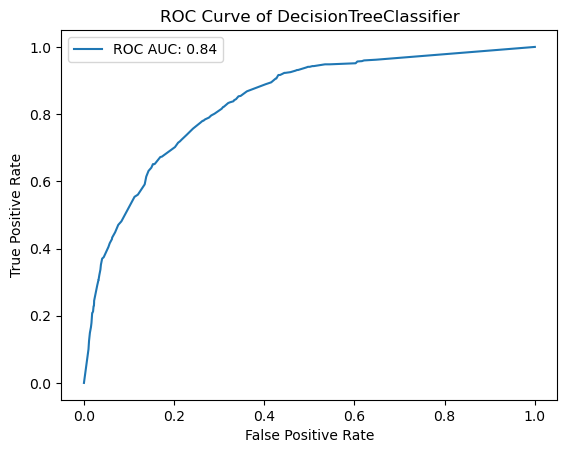

In [51]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from sklearn.tree import DecisionTreeClassifier

model_dtr = DecisionTreeClassifier()


param_grid = { 
    'min_samples_leaf':[1, 2, 3],
    'min_samples_split': [2, 4], 
    'max_depth' :[5, 10, 15],
    'max_features': [20],
    'random_state':[42]
}

grid_search = GridSearchCV(estimator=model_dtr, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(features_train_resample, target_train_resample)

print("Best parameters:", grid_search.best_params_)

best_dtr = grid_search.best_estimator_

pred = best_dtr.predict_proba(features_valid_transformed)[:, 1]

accuracy = best_dtr.score(features_valid_transformed, target_valid)
roc_auc = roc_auc_score (target_valid, pred)

print()
print("AUC-ROC of DecisionTree model:", roc_auc)
print("Accuracy of DecisionTree model:", accuracy)

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr,__ = roc_curve(target_valid, pred)
plt.plot(fpr, tpr, label=f"ROC AUC: {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of DecisionTreeClassifier")
plt.legend()
plt.show()


### The DecisionTreeClassifier tested on validation set and produced AUC-ROC of 85%  and Accuracy of 76% which is pretty similar with base model.

## Model 2: RandomForestClassifier

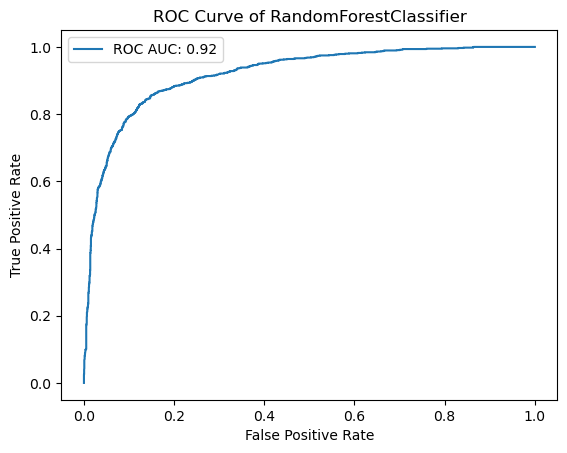

In [52]:

from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()


param_grid = { 
    'min_samples_leaf':[1, 2, 3],
    'n_estimators':[20, 50, 80 ],
    'min_samples_split': [2, 4], 
    'max_depth' :[5, 10, 15],
    'random_state':[42]
}

grid_search = GridSearchCV(estimator=model_rf, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(features_train_resample, target_train_resample)

print("Best parameters:", grid_search.best_params_)

best_rf = grid_search.best_estimator_
# pred_binary = best_rf.predict(features_valid_transformed)
pred = best_rf.predict_proba(features_valid_transformed)[:, 1]

accuracy = best_rf.score(features_valid_transformed, target_valid)

roc_auc = roc_auc_score(target_valid, pred)
print()
print("AUC-ROC of RandomForest model:", roc_auc)
print("Accuracy of RandomForest model:", accuracy)


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(target_valid, pred)
plt.plot(fpr, tpr, label=f"ROC AUC: {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of RandomForestClassifier")
plt.legend()
plt.show()


### When RandomForestClassifier tested on validation set. It produced AUC-ROC of 91% and Accuracy of 86%. It is the best performing model on validation set.

## Model 3: LightGBMClassifier

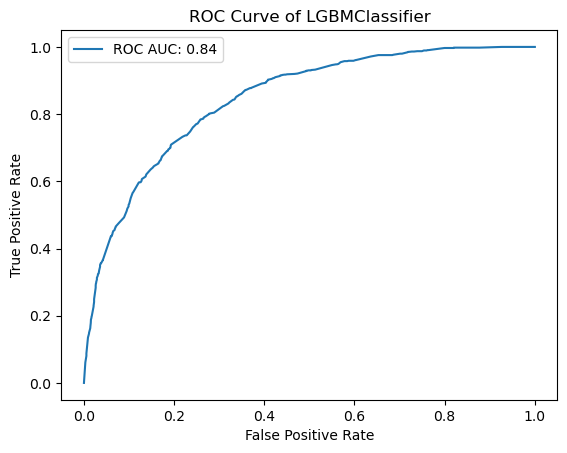

In [53]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from lightgbm import LGBMClassifier

model_lgbm = LGBMClassifier()


param_grid = { 
    'learning_rate':[0.01, 0.1, 0.5, 1.0],
    'n_estimators':[3, 5],
    'num_leaves': [20, 25], 
    'max_depth' :[5, 10, 15]
}

grid_search = GridSearchCV(estimator=model_lgbm, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(features_train_resample, target_train_resample)

print("Best parameters:", grid_search.best_params_)

best_lgbm = grid_search.best_estimator_
pred = best_lgbm.predict_proba(features_valid_transformed)[:, 1]

accuracy = best_lgbm.score(features_valid_transformed, target_valid)
roc_auc = roc_auc_score (target_valid, pred)
print()
print("AUC-ROC of LGBMClassifier model:", roc_auc)
print("Accuracy of LGBMClassifier model:", accuracy)


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve


fpr, tpr, _ = roc_curve(target_valid, pred)
plt.plot(fpr, tpr, label=f"ROC AUC: {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of LGBMClassifier")
plt.legend()
plt.show()


### When LGBMClassifier tested on validation set. It produced AUC-ROC of 84% and Accuracy of 75%. It performed second best after RandomforestClassifier.

## Model 4: XGBoostClassifier

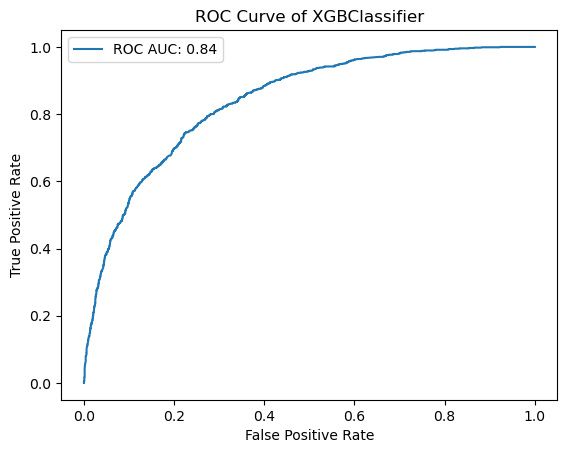

In [54]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

from xgboost import XGBClassifier

model_xgb = XGBClassifier()

param_grid= {
            'learning_rate':[0.1, 0.5, 1.0],
             'min_child_weight':[1, 10, 20, 30],
             'max_depth':[3, 6, 10, 15],
             'subsample':[0, 0.5, 0.7, 0.9], 
             'colsample_bytree':[0.3, 0.6, 0.9]
         

}

grid_search = GridSearchCV(estimator=model_xgb, param_grid=param_grid, cv=5, scoring='roc_auc')
grid_search.fit(features_train_resample, target_train_resample)

print("Best parameters:", grid_search.best_params_)

best_xgb = grid_search.best_estimator_

accuracy = best_xgb.score(features_valid_transformed, target_valid)
# pred_binary = best_xgb.predict(features_valid_transformed)

pred = best_xgb.predict_proba(features_valid_transformed)[:, 1]

roc_auc = roc_auc_score (target_valid, pred)

print()
print("AUC-ROC of XGBClassifier model:", roc_auc)
print("Accuracy of XGBClassifier model:", accuracy)



import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(target_valid, pred)
plt.plot(fpr, tpr, label=f"ROC AUC: {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of XGBClassifier")
plt.legend()
plt.show()



### XGBClassifier tested on validation set and produced AUC-ROC of 83% and Accuracy of 75%.

## Final model: RandomForestClassifier

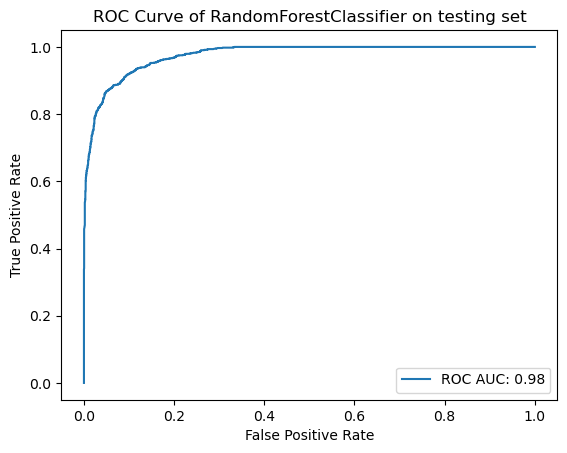

In [55]:
from sklearn.ensemble import RandomForestClassifier

final_model_1 = RandomForestClassifier(max_depth= 15, min_samples_leaf= 2, min_samples_split= 2, n_estimators = 80, random_state= 42)

final_model_1.fit(features_train_resample, target_train_resample)
accuracy = final_model_1.score(features_test_transformed, target_test)

pred = final_model_1.predict_proba(features_test_transformed)[:, 1]

roc_auc = roc_auc_score(target_test, pred)

print()
print("AUC-ROC of RandomForestClassifier model:", roc_auc)
print("Accuracy of RandomForestClassifier model:", accuracy)


import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

fpr, tpr, _ = roc_curve(target_test, pred)
plt.plot(fpr, tpr, label=f"ROC AUC: {roc_auc:.2f}")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve of RandomForestClassifier on testing set")
plt.legend()
plt.show()

  

#### The RandomForestClassifier truly shines, achieving both a high AUC-ROC of 97% and Accuracy of 91% , indicating its superior ability to differentiate between classes and its overall predictive power on the testing set. It's no surprise that it stands out as the best model for Interconnect Telecom company among all those tested.

# Conclusion

This analysis successfully leveraged data science techniques to reveal critical insights into customer retention and churn prediction for Interconnect Telecom. The primary objective was to classify customers based on their churn status (indicated by the presence or absence of an ‘end date’) using the df['enddate'] variable as the target. The project followed a predefined work plan, encompassing data download, exploration, preprocessing, exploratory data analysis (EDA), feature engineering, scaling, balancing, model building, hyperparameter tuning, model selection, and final testing.

### Methodology and Key Findings:
The process began by downloading and exploring the raw data, noting that different CSV files had varying numbers of rows. This initial exploration identified the need for comprehensive preprocessing.

### Data Preprocessing and Feature Engineering:
        Data from various data frames was merged into a single data frame. The personal data frame contained most data, but others like phone and contract were missing over 2000 rows. Missing values were addressed primarily using Simple Imputer, which replaced absent entries with the most frequent values in each column. Missing values in the 'total charges' column were specifically handled by filling them with 0. This step was crucial for completing the dataset, stabilizing predictions, and reducing variability. Column names were converted to lowercase to avoid retrieval errors. Data types were adjusted; specifically, 'total charges' were converted to float, and 'begin date' was converted to datetime. A feature correlation analysis was conducted, including a heatmap, to understand variable relationships.

### Key correlations were identified:When Pearson correlation was conducted the results were as follows:

        • A moderate positive correlation (0.65) exists between ‘monthlycharges’ and ‘totalcharges’ also in  ‘streamingtv’ and ‘streamingmovies’. 
        • ‘Type’ and ‘totalcharges’ showed a weak positive correlation (0.45), indicating that total charges tend to increase as the contract type changes from one year to two years, though not consistently.          
        • A strong negative correlation (-0.83) was found between ‘begin date’ and total charges, suggesting earlier start dates might correlate with lower total charges.
        • EDA also revealed that there are fewer senior citizens compared to non-senior citizens in the dataset.

### Data Preparation for Modeling:

        Categorical variables were transformed using One-Hot Encoding. This included columns like enddate, type, paperlessbilling, paymentmethod, gender, seniorcitizen, partner, dependents, multiplelines, internetservice, onlinesecurity, onlinebackup, deviceprotection, techsupport, streamingtv, and streamingmovies. Numeric columns such as monthly charges and total charges were scaled using Standard Scaler. This ensured equal contribution from these features, enhancing prediction precision and consistency. The dataset exhibited class imbalance, with 73% of customers still with the company (loyal) and 27% having churned. SMOTE was applied to the training data to address this imbalance by introducing synthetic data points for the minority class, enhancing model fairness and robustness.

### Model Development and Selection:

        The dataset was split into training, validation, and testing sets.  Logistic Regression served as the base model. Tested on the validation set, it yielded an AUC-ROC of 80% and an Accuracy of 72%. Hyper parameter tuning using grid search with cross-validation was performed on several advanced models: Random Forest Classifier, Decision Tree Classifier, XGB Classifier, and Light GBM Classifier. 
        Performance on the validation set was compared:
        •	Decision Tree Classifier: AUC-ROC 85%, Accuracy 76%.
        •	Random Forest Classifier: AUC-ROC 91%, Accuracy 86%.
        •	LGBM Classifier: AUC-ROC 84%, Accuracy 75%.
        •	XGB Classifier: AUC-ROC 83%, Accuracy 75%. 
        •	Based on validation performance, Random Forest Classifier emerged as the best model.

### Final Model Performance and Excellence:

        The chosen Random Forest Classifier was tested on the unseen testing dataset. It achieved a final ROC_AUC score of 97% and an accuracy of 91%. These results demonstrate the model's superior ability to differentiate between loyal and churned customers and highlight its robustness and predictive reliability on new data.

### Difficulties Encountered:

        Inconsistent row counts across data frames led to a significant volume of missing values. The data presented a class imbalance between the positive and negative classes (loyal vs. churned customers). Numeric data features were initially on different scales.

### Actionable Recommendations: 
Based on the insights derived from the analysis and the predictive power of the final model, I would recommed these strategies:
        • Strategic Retention Initiatives: Proactively target customers identified by the model as likely to churn. Predictive insights from features like service type, monthly charges, and ‘begindate’ can inform tailored interventions to address specific pain points and improve satisfaction.
        • Loyalty Incentives: Given the negative correlation between ‘begin date’ and total charges, consider introducing reward programs specifically for long-term customers (those with higher ‘begin date’ values) to strengthen their connection with the company and encourage longer tenure.
        • Leveraging Streaming Services: Capitalize on the positive correlation between ‘streamingtv’ and ‘streamingmovies’. Bundle these services or create personalized marketing campaigns around them to enhance customer engagement and drive cross-sell opportunities.

             Implementing these strategies, supported by the predictive power of the Random Forest Classifier model, can significantly bolster customer retention rates, refine service delivery, and optimize profitability. Sustained analysis of customer data is essential for ongoing refinement of both the predictive modeling and business strategies to ensure continuous operational improvements.

